In [1]:
# Instalasi library untuk scraping Google Play Store
!pip install google-play-scraper

# Impor library yang dibutuhkan
import pandas as pd
from google_play_scraper import reviews, Sort
import matplotlib.pyplot as plt
import seaborn as sns

print("Library siap digunakan!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.3 MB/s eta 0:00:00
Library siap digunakan!


In [2]:
# Langkah 2 (Revisi): Ambil Data Ulasan Aplikasi Travoy

# ID aplikasi Travoy dari link yang Anda berikan
app_id = 'com.jm.travoy'

# Ambil 200 ulasan terbaru (sort=Sort.NEWEST)
result, continuation_token = reviews(
    app_id,
    lang='id',          # Bahasa: Indonesia
    country='id',       # Negara: Indonesia
    sort=Sort.NEWEST,
    count=200           # Jumlah ulasan yang diambil
)

# Ubah hasil menjadi sebuah DataFrame (tabel)
df_ulasan = pd.DataFrame(result)

# Pilih kolom yang relevan saja dan tampilkan 5 ulasan pertama untuk pengecekan
df_ulasan = df_ulasan[['userName', 'content', 'score', 'at']]
print(f"Berhasil mendapatkan {len(df_ulasan)} ulasan dari aplikasi Travoy.")
df_ulasan.head()

Berhasil mendapatkan 200 ulasan dari aplikasi Travoy.


,userName,content,score,at
0,Gustiawan Timor Rimbawan,mudah dan simple,5,2025-10-14 16:06:09
1,David Atmahardi,Ok siap,5,2025-10-13 03:02:51
2,Ridwan Hasanuddin,Ini sistemnya emang lagi gabisa dibuka atau gi...,3,2025-10-13 02:03:17
3,Sandy Rubianto (Email Utama),melihat resi digital tidak muncul,1,2025-10-11 04:02:58
4,edward Riyanman jaya,aplikasi travoy sangat buruk. tidak semua tran...,1,2025-10-09 02:18:43


In [3]:
# --- TEMPAT UNTUK KODE ANDA ---
# Ganti bagian simulasi di bawah ini dengan kode pemanggilan API IBM Granite Anda.

def analyze_sentiment(review_text):
  """
  Fungsi untuk mengirim teks ulasan ke IBM Granite dan mendapatkan sentimen.
  """
  # CONTOH PROMPT UNTUK DIKIRIM KE IBM GRANITE:
  # prompt = f"Klasifikasikan sentimen ulasan ini sebagai 'Positif', 'Negatif', atau 'Netral'.
  #            Jawab dengan satu kata saja. Ulasan: '{review_text}'"

  # (Di sini Anda akan menulis kode untuk mengirim `prompt` ke API IBM Granite
  # dan menerima hasilnya, misalnya: sentiment_result = api_call(prompt))

  # --- AWAL BAGIAN SIMULASI (HARUS ANDA GANTI) ---
  # Untuk tujuan demo, kita buat logika sederhana.
  # GANTI LOGIKA INI DENGAN HASIL DARI API ANDA.
  if review_text is None:
      return 'Netral'
  review_lower = str(review_text).lower()
  if any(kata in review_lower for kata in ['bagus', 'keren', 'terbantu', 'baik', 'mantap']):
    return 'Positif'
  elif any(kata in review_lower for kata in ['error', 'susah', 'buruk', 'tidak bisa', 'jelek', 'sulit']):
    return 'Negatif'
  else:
    return 'Netral'
  # --- AKHIR BAGIAN SIMULASI ---

# Terapkan fungsi analisis sentimen ke setiap ulasan di kolom 'content'
# Proses ini mungkin memakan waktu jika menggunakan API asli
df_ulasan['sentiment'] = df_ulasan['content'].apply(analyze_sentiment)

print("Analisis sentimen selesai.")
# Tampilkan hasil analisis sentimen
df_ulasan[['content', 'sentiment']].head()

Analisis sentimen selesai.


,content,sentiment
0,mudah dan simple,Netral
1,Ok siap,Netral
2,Ini sistemnya emang lagi gabisa dibuka atau gi...,Netral
3,melihat resi digital tidak muncul,Netral
4,aplikasi travoy sangat buruk. tidak semua tran...,Negatif


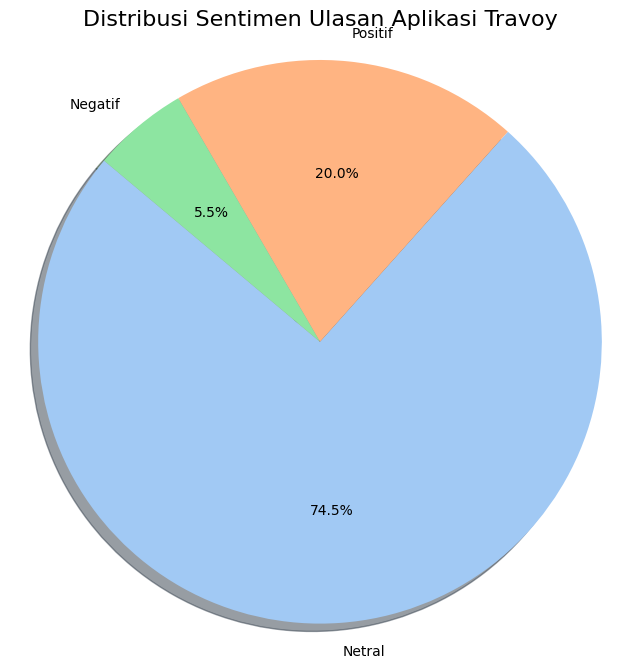


Jumlah Ulasan Berdasarkan Sentimen:
sentiment
Netral     149
Positif     40
Negatif     11
Name: count, dtype: int64


In [4]:
# Hitung jumlah setiap kategori sentimen
sentiment_counts = df_ulasan['sentiment'].value_counts()

# Siapkan data untuk pie chart
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = sns.color_palette('pastel')[0:len(labels)]

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Tambahkan judul
plt.title('Distribusi Sentimen Ulasan Aplikasi Travoy', fontsize=16)
plt.axis('equal')  # Agar lingkaran terlihat sempurna

# Tampilkan chart
plt.show()

# Tampilkan juga jumlah data mentahnya
print("\nJumlah Ulasan Berdasarkan Sentimen:")
print(sentiment_counts)